In [1]:
import pandas as pd

In [2]:
import random

In [3]:
L = []
for i in range(10000):
  a = random.randint(1,6)
  b = random.randint(1,6)

  L.append(a + b)

In [4]:
len(L)

10000

In [5]:
L[:5]

[2, 7, 6, 10, 8]

In [6]:
s = (pd.Series(L).value_counts()/pd.Series(L).value_counts().sum()).sort_index()
s

2     0.0248
3     0.0614
4     0.0767
5     0.1104
6     0.1376
7     0.1720
8     0.1404
9     0.1094
10    0.0842
11    0.0550
12    0.0281
Name: count, dtype: float64

<Axes: >

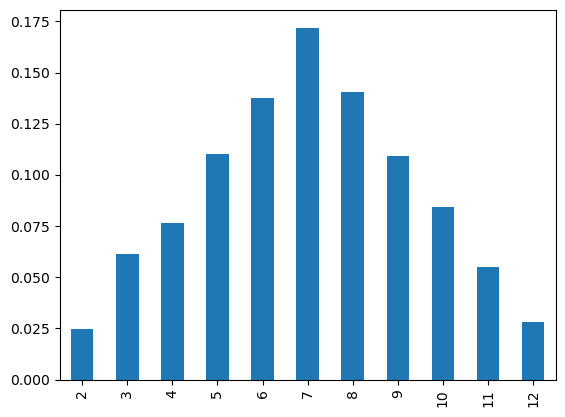

In [7]:
s.plot(kind='bar')

In [8]:
import numpy as np
np.cumsum(s)

2     0.0248
3     0.0862
4     0.1629
5     0.2733
6     0.4109
7     0.5829
8     0.7233
9     0.8327
10    0.9169
11    0.9719
12    1.0000
Name: count, dtype: float64

<Axes: >

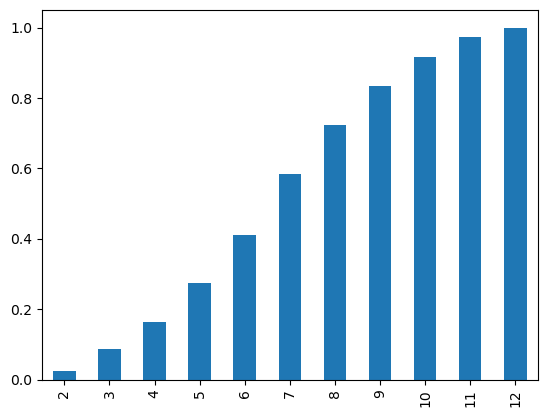

In [9]:
np.cumsum(s).plot(kind='bar')

# Parametric Density Estimation

In [10]:
import matplotlib.pyplot as plt
import numpy as np
from numpy.random import normal

sample = normal(loc=50, scale=5,size=1000)

In [11]:
sample.mean()

50.2331295148548

(array([  9.,  31., 106., 194., 193., 236., 132.,  68.,  24.,   7.]),
 array([35.90159191, 38.89459324, 41.88759457, 44.8805959 , 47.87359723,
        50.86659856, 53.85959989, 56.85260122, 59.84560255, 62.83860388,
        65.83160521]),
 <BarContainer object of 10 artists>)

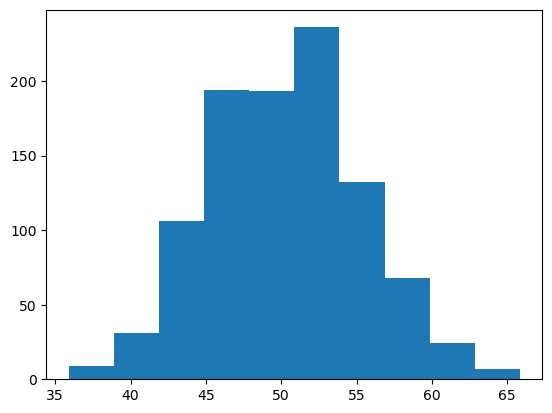

In [12]:
# plot histogram to understand the distribution of data
plt.hist(sample,bins=10)

In [13]:
# calculate sample mean and sample std dev
sample_mean = sample.mean()
sample_std = sample.std()

In [14]:
# fit the distribution with the above parameters

from scipy.stats import norm
dist = norm(sample_mean, sample_std)

In [15]:
values = np.linspace(sample.min(),sample.max(),100)

In [16]:
sample.max()

65.83160520648804

In [17]:
probabilities = [dist.pdf(i) for i in values]  #density

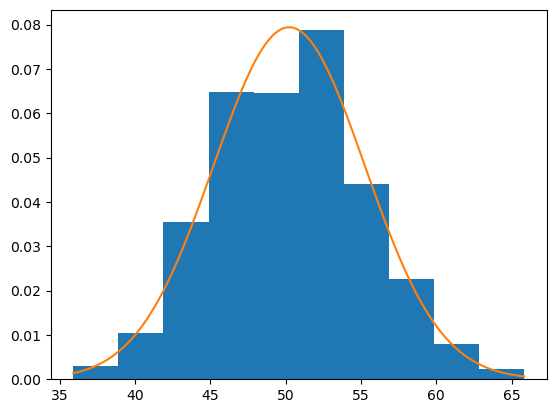

In [18]:
# plot the histogram and pdf
plt.hist(sample,bins=10,density=True)
plt.plot(values,probabilities)

# KDE

In [19]:
# generate a sample
sample1 = normal(loc=20, scale=5, size=300)
sample2 = normal(loc=40, scale=5, size=700)
sample = np.hstack((sample1, sample2))

In [20]:
sample

array([17.34786462, 22.95624089, 17.97760654, 19.36061431, 18.14389647,
       14.29123354,  9.96115063, 18.28140546, 20.13464919, 15.1653245 ,
       16.52076768, 19.65747247, 15.94561287, 27.60848008, 19.48615082,
       12.15228706, 24.09395284, 20.83051938, 14.70004701, 16.66602785,
       26.90206496, 21.48926118, 20.1089731 , 14.59199218, 16.56068396,
       18.31626617, 29.57892851, 17.2462745 , 13.31205892, 19.53492542,
       28.81715324, 17.76557177, 30.49204829, 11.07638415, 21.10869961,
       19.92438086, 23.00408275, 19.011871  , 18.87702325, 21.4451419 ,
       26.5781054 , 26.59123846, 21.04280515, 26.38097359, 23.54964623,
       20.45231504, 14.7710158 , 18.85523532, 16.93631632, 23.61483877,
       12.32999756, 23.83792049, 25.41359537, 22.68344499, 18.49980398,
       19.30894712, 14.69493923, 25.82127736, 20.42600174, 17.009396  ,
       22.86155299, 27.53288078, 20.77513118, 19.10675889, 16.70235518,
       15.60848362, 26.59067641, 23.01426641, 11.63055983, 11.52

(array([ 2.,  0.,  0.,  4.,  4.,  6.,  5., 10., 18.,  4., 16., 17., 29.,
        32., 25., 19., 17., 17., 13., 15., 12., 11., 12.,  8., 14., 11.,
        16., 18., 17., 23., 24., 38., 42., 48., 38., 52., 52., 41., 37.,
        34., 45., 31., 37., 27., 24., 14., 11.,  8.,  0.,  2.]),
 array([ 6.95720853,  7.87162189,  8.78603526,  9.70044862, 10.61486199,
        11.52927535, 12.44368872, 13.35810208, 14.27251545, 15.18692881,
        16.10134218, 17.01575554, 17.93016891, 18.84458227, 19.75899564,
        20.673409  , 21.58782237, 22.50223573, 23.4166491 , 24.33106246,
        25.24547583, 26.15988919, 27.07430256, 27.98871592, 28.90312929,
        29.81754265, 30.73195602, 31.64636938, 32.56078275, 33.47519611,
        34.38960948, 35.30402284, 36.21843621, 37.13284957, 38.04726294,
        38.9616763 , 39.87608967, 40.79050303, 41.7049164 , 42.61932976,
        43.53374313, 44.44815649, 45.36256986, 46.27698322, 47.19139659,
        48.10580995, 49.02022332, 49.93463668, 50.84905005,

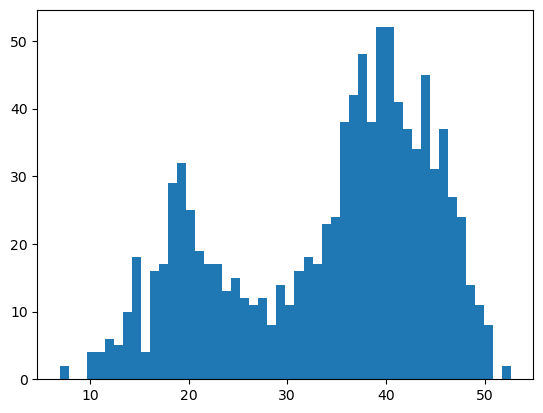

In [21]:
# plot histogram bins=50
plt.hist(sample,bins=50)

In [22]:
from sklearn.neighbors import KernelDensity

model = KernelDensity(bandwidth=5, kernel='gaussian')

# convert data to a 2D array
sample = sample.reshape((len(sample), 1))

model.fit(sample)

KernelDensity(bandwidth=5)

In [23]:
values = np.linspace(sample.min(),sample.max(),100)
values = values.reshape((len(values), 1))

In [24]:
probabilities = model.score_samples(values)
probabilities = np.exp(probabilities)

In [25]:
#score_samples(values) returns the log-density estimate of the input samples values. This is because the score_samples() method of the KernelDensity class returns the logarithm of the probability density estimate rather than the actual probability density estimate

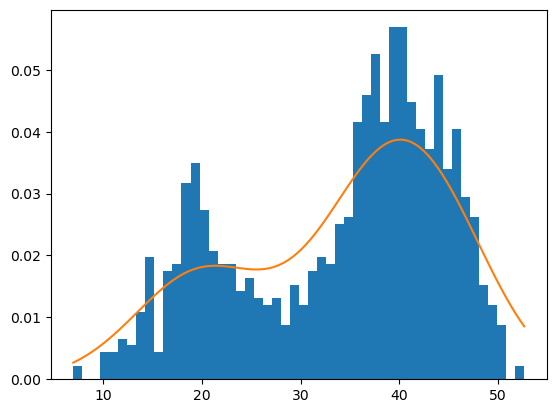

In [26]:
plt.hist(sample, bins=50, density=True)
plt.plot(values[:], probabilities)
plt.show()

In [27]:
import seaborn as sns

<Axes: ylabel='Density'>

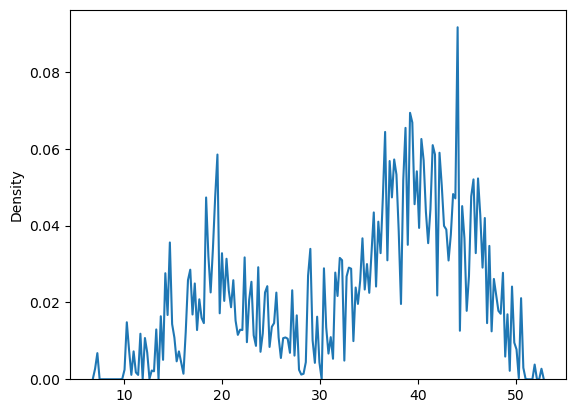

In [28]:
sns.kdeplot(sample.reshape(1000),bw_adjust=0.02)

In [29]:
import seaborn as sns

In [30]:
df = sns.load_dataset('iris')

In [31]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


<Axes: xlabel='sepal_length', ylabel='Density'>

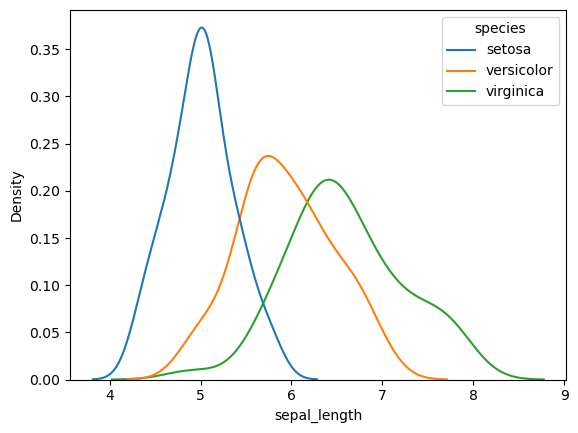

In [32]:
sns.kdeplot(data=df,x='sepal_length',hue='species')

<Axes: xlabel='sepal_width', ylabel='Density'>

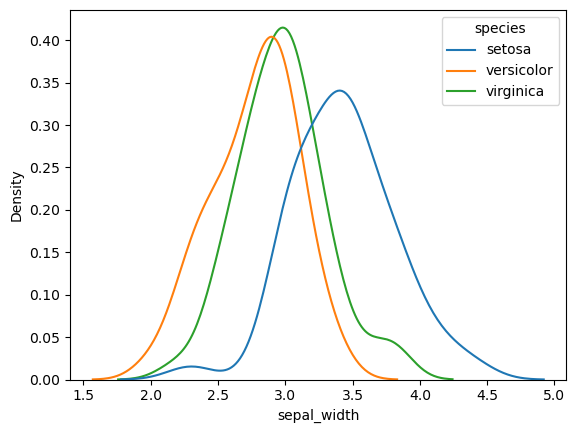

In [33]:
sns.kdeplot(data=df,x='sepal_width',hue='species')

<Axes: xlabel='petal_length', ylabel='Density'>

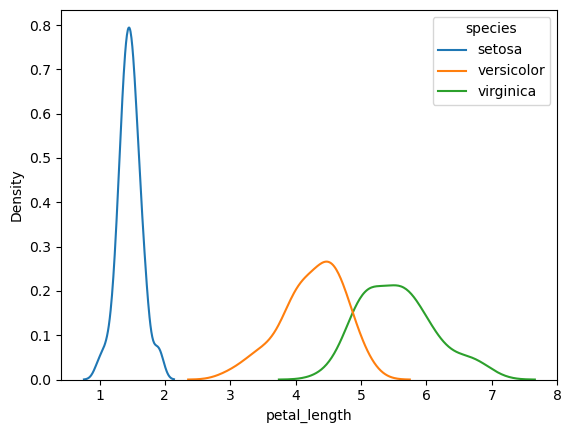

In [34]:
sns.kdeplot(data=df,x='petal_length',hue='species')

<Axes: xlabel='petal_width', ylabel='Density'>

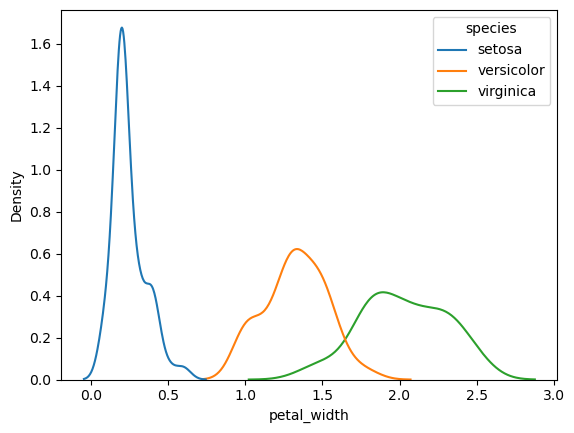

In [35]:
sns.kdeplot(data=df,x='petal_width',hue='species')

In [36]:
import seaborn as sns

In [37]:
#sns.kdeplot(df['petal_width'],hue=df['species'])
#sns.ecdfplot(data=df,x='petal_width',hue='species')

<Axes: xlabel='petal_width', ylabel='Density'>

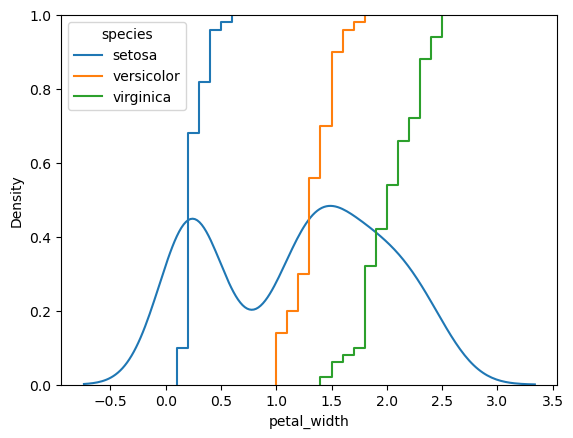

In [38]:
sns.kdeplot(df['petal_width'])
sns.ecdfplot(data=df,x='petal_width',hue='species')

In [39]:
titanic = pd.read_csv('https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv')

In [40]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


<Axes: xlabel='Age', ylabel='Density'>

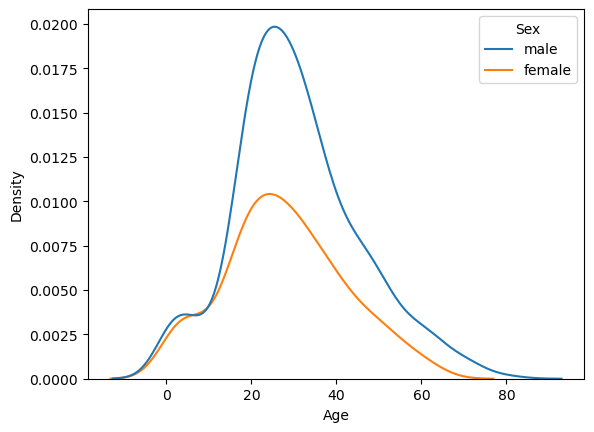

In [41]:
# code here
sns.kdeplot(data=titanic,x='Age',hue='Sex')

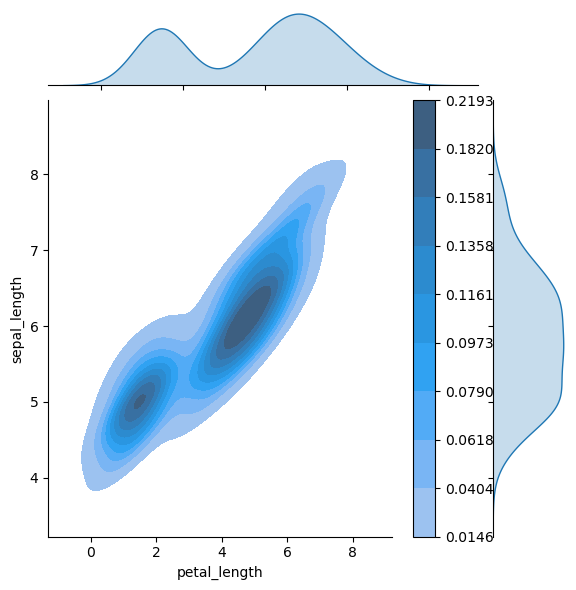

In [42]:
 sns.jointplot(data=df, x="petal_length", y="sepal_length", kind="kde",fill=True,cbar=True)

<Axes: xlabel='Age', ylabel='Density'>

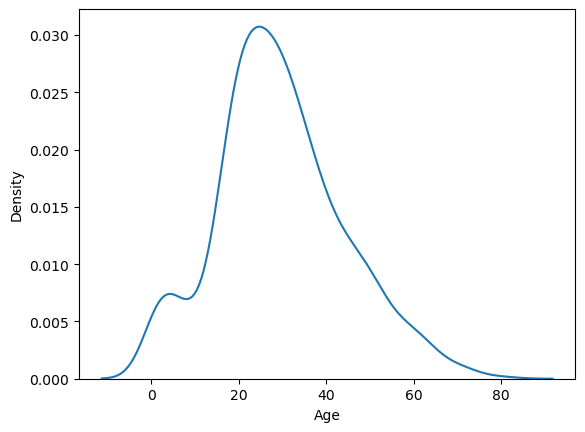

In [43]:
sns.kdeplot(titanic['Age'])

In [44]:
titanic['Age'].mean()

29.69911764705882

In [45]:
x = (titanic['Age'] - titanic['Age'].mean())/titanic['Age'].std()

<Axes: xlabel='Age', ylabel='Density'>

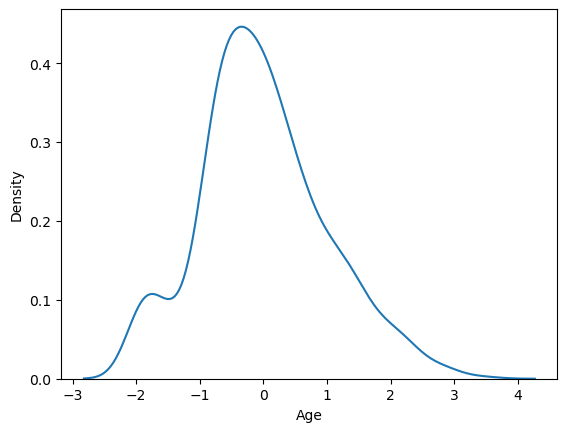

In [46]:
sns.kdeplot(x)

In [47]:
x.mean()

2.388378943731429e-16

In [48]:
x.std()

0.9999999999999994

In [49]:
titanic['Age'].skew()

0.38910778230082704

In [50]:
titanic['Age'].mean() + 3*titanic['Age'].std()

73.27860964406095

In [51]:
titanic['Age'].mean() - 3*titanic['Age'].std()

-13.88037434994331

In [52]:
titanic[titanic['Age'] > 73]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
630,631,1,1,"Barkworth, Mr. Algernon Henry Wilson",male,80.0,0,0,27042,30.000,A23,S
851,852,0,3,"Svensson, Mr. Johan",male,74.0,0,0,347060,7.775,NaN,S


In [53]:
titanic['Age'].max()

80.0